In [145]:
import pandas as pd
import numpy as np

# **Data Loading**

In [146]:
org_df = pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding='latin1')

<ipython-input-146-9f495aa6e767>:1: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



In [147]:
print(org_df.shape)
org_df

(181691, 135)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


# Feature Selection

In [148]:
# There are 135 columns in the dataframe, as it would be burdensome and unproductive to perform cleaning and EDA on the unnecessary columns in this huge dataset,
# selecting the columns which will aid in concluding on the aim of the project and neglecting other columns if they are redundant, unwanted and duplicates.

new_df = org_df[['iyear', 'imonth', 'iday', 'country_txt', 'city', 'latitude', 'longitude', 'success', 'motive', 'attacktype1_txt', 'targtype1_txt', 'target1', 'weaptype1_txt', 'nkill', 'nkillus', 'nwound', 'nwoundus', 'ishostkid', 'nhostkid', 'ransom', 'ransomamt']]
print(new_df.shape)
new_df.head(5)

(181691, 21)


,iyear,imonth,iday,country_txt,city,latitude,longitude,success,motive,attacktype1_txt,...,target1,weaptype1_txt,nkill,nkillus,nwound,nwoundus,ishostkid,nhostkid,ransom,ransomamt
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,1,NaN,Assassination,...,Julio Guzman,Unknown,1.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,1,NaN,Hostage Taking (Kidnapping),...,"Nadine Chaval, daughter",Unknown,0.0,NaN,0.0,NaN,1.0,1.0,1.0,800000.0
2,1970,1,0,Philippines,Unknown,15.478598,120.599741,1,NaN,Assassination,...,Employee,Unknown,1.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
3,1970,1,0,Greece,Athens,37.997490,23.762728,1,NaN,Bombing/Explosion,...,U.S. Embassy,Explosives,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,1970,1,0,Japan,Fukouka,33.580412,130.396361,1,NaN,Facility/Infrastructure Attack,...,U.S. Consulate,Incendiary,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


# **CLEANING**

# Duplicates

In [149]:
# 1 Checking duplicates in the dataframe and dropping if any

dups = new_df.duplicated().sum()
if dups > 0:
  new_df = new_df.drop_duplicates()
  print("Dropped duplicates! Count:", dups)
else:
  print("No duplicates found!")

Dropped duplicates! Count: 10585


# Null Values

In [150]:
# 2 Checking null/NaN in the dataframe

nulls = new_df.isnull().sum()
for i, j in nulls.items():
  print(i,j)

iyear 0
imonth 0
iday 0
country_txt 0
city 431
latitude 4004
longitude 4005
success 0
motive 121590
attacktype1_txt 0
targtype1_txt 0
target1 545
weaptype1_txt 0
nkill 9379
nkillus 57570
nwound 15173
nwoundus 57826
ishostkid 165
nhostkid 157766
ransom 100893
ransomamt 169760


# Drop Columns

In [151]:
# 3 Columns to drop
# Analyzing the columns significance before dropping

def value_cols(col_name):
  for i,j in new_df[col_name].value_counts().items():

    # Tracking columns with value counts or frequencies greater than 50 at least, to study similarities and realtions
    if j > 50:
      print(col_name,i,j, sep="---")
  print("\n")

# choosing columns with highest null values from above to analyze
high_null_cols = ['motive', 'nkillus', 'nwoundus', 'nhostkid', 'ransom', 'ransomamt']

for i in high_null_cols:
  value_cols(i)

motive---Unknown---14715
motive---The specific motive for the attack is unknown.---14297
motive---The specific motive is unknown; however, sources noted that the attack may have been part of a larger trend of violence related to Bangladesh's nationwide hartal, which began on January 6, 2015.---279
motive---The specific motive for the attack is unknown..---146
motive---The specific motive for the attack is unknown or was not reported.---144
motive---The specific motive for the attack is unknown---73
motive---Part of a campaign by Islamic extremists to destabilize Algeria by weakening security forces protecting the 'apostate' Algerian government.---66
motive---The specific motive for the attack was political.---52


nkillus---0.0---112635
nkillus---1.0---589
nkillus---2.0---159
nkillus---3.0---53


nwoundus---0.0---112635
nwoundus---1.0---303
nwoundus---2.0---112
nwoundus---3.0---61


nhostkid---1.0---5396
nhostkid---2.0---1847
nhostkid----99.0---1167
nhostkid---3.0---1040
nhostkid---4.0

In [152]:
# Most of the counts for motive column are reported as unknown directly or indirectly. Hence this column can be dropped.
# For nkillus and nwoundus column, 0.0 is the most frequently occurring and also no major significance found with other values. So, dropping these.
# The column nhostkid seems to be dependent on ishostkid, so keeping this column intact for now.
# For ransom column, 0 is no ransom asked, 1 is ransom asked and 9 seems to be a miss value.
# So dropping both ransom and ransomamt as less number of 1.0 is found in ransom column.

drop_col = ["motive", 'nkillus', 'nwoundus', 'ransom', 'ransomamt']

# Dropping columns
df = new_df.drop(drop_col, axis=1)

# Drop Rows with Null Values

In [153]:
df.isnull().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
city                  431
latitude             4004
longitude            4005
success                 0
attacktype1_txt         0
targtype1_txt           0
target1               545
weaptype1_txt           0
nkill                9379
nwound              15173
ishostkid             165
nhostkid           157766
dtype: int64

In [154]:
df.dtypes

iyear                int64
imonth               int64
iday                 int64
country_txt         object
city                object
latitude           float64
longitude          float64
success              int64
attacktype1_txt     object
targtype1_txt       object
target1             object
weaptype1_txt       object
nkill              float64
nwound             float64
ishostkid          float64
nhostkid           float64
dtype: object

In [155]:
# As Latitude, Longitude, Target and City cannot be predicted with mean or mode efficiently and considering
# the minute number of NaNs in this column, dropping those rows.

df.dropna(subset = ['latitude', 'longitude', 'target1', 'city'], inplace=True)
df.isnull().sum()
# nkill, nwound, nhostkid, nhostkid can be handled

iyear                   0
imonth                  0
iday                    0
country_txt             0
city                    0
latitude                0
longitude               0
success                 0
attacktype1_txt         0
targtype1_txt           0
target1                 0
weaptype1_txt           0
nkill                8893
nwound              14563
ishostkid             165
nhostkid           153481
dtype: int64

# Handling Null Values

In [156]:
# nkill, nwound are continous variables
# Replacing the null values of these columns with mean value

df["nkill"].fillna(df["nkill"].mean(), inplace = True)
df["nwound"].fillna(df["nwound"].mean(), inplace = True)
df.isnull().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
city                    0
latitude                0
longitude               0
success                 0
attacktype1_txt         0
targtype1_txt           0
target1                 0
weaptype1_txt           0
nkill                   0
nwound                  0
ishostkid             165
nhostkid           153481
dtype: int64

# Replacing Non Positive Values

In [157]:
cols = df.describe().columns

# Finding out if there is a negative number of hostages
def neg_values(c):
  neg_val_col = []
  for i,j in df[c].value_counts().items():
    if i < 0:
      neg_val_col.append(i)
  return neg_val_col

negative_cols = []
for i in cols:
  neg_val_col = neg_values(i)
  if len(neg_val_col) > 0:
    negative_cols.append((i, neg_val_col))
print(negative_cols)

[('latitude', [-11.967368, -33.366238, -34.61768, -13.152712, -26.184113, -3.375828, -0.357847, -26.252697, -12.068306, -16.509317, -29.861824, -33.050125, -0.211188, -33.010693, -33.941849, -22.908278, -36.816006, -31.399301, -34.891151, -1.28518, -12.939782, -6.208821, -25.748281, -12.787148, -10.680652, -34.68631, -2.170832, -14.31884, -13.531688, -23.550711, -1.949011, -8.838837, -9.529924, -13.163874, -25.891968, -4.389166, -0.45612, -9.297478, -12.050934, -29.965819, -26.363175, -33.469115, -16.409501, -0.791773, -17.783219, -17.825166, -38.734133, -12.765538, -26.103533, -4.041179, -22.567335, -32.951052, -17.382789, -15.415393, -8.111825, -15.84065, -34.170331, -29.601439, -29.658879, -33.873651, -17.828394, -8.54966, -12.003379, -26.353159, -25.282773, -34.921295, -6.875968, -36.748146, -1.393147, -14.063467, -1.658501, -32.985771, -22.2758, -13.65311, -26.574288, -4.225356, -9.929478, -33.9585, -0.453142, -11.161067, -12.948146, -11.520494, -11.122722, -29.310013, -7.815617, 

In [158]:
# Ignoring latitude and longitude

# Dropping records with -9.0 and -99.0 as 1.0 signifies if kid is hostage
# 0.0 specifies kid is not hostage and -99.0 is not a possible number
for c, v in [('ishostkid', [-9.0]), ('nhostkid', [-99.0])]:
  df = df[df[c] != v[0]]

In [159]:
#Handling the Unexpected Zero Values

print(df['imonth'].value_counts())
print(df['iday'].value_counts())

# Dropping the 0 values in imonth and iday
df = df[df['imonth'] != 0]
df = df[df['iday'] != 0]

5     15053
7     14789
8     14377
10    14144
6     13989
3     13885
4     13882
11    13703
1     13464
9     12674
2     12540
12    12281
0        15
Name: imonth, dtype: int64
15    5828
1     5669
16    5533
10    5513
13    5497
4     5494
14    5491
19    5475
7     5470
27    5461
3     5456
12    5455
9     5425
11    5403
20    5391
25    5389
5     5382
28    5381
2     5380
18    5372
24    5324
17    5310
6     5305
8     5284
26    5257
23    5248
22    5205
21    5179
29    4983
30    4650
31    2874
0      712
Name: iday, dtype: int64


# Merging Columns

In [160]:
# ishostkid and nhostkid columns are related columns, so,
# Creating a column HostKidsCount
# If ishostkid is 0 setting HostKidsCount to 0
# If ishostkid is 1 setting HostKidsCount to value in nhostkid

df['HostKidsCount'] = df['ishostkid']
df['HostKidsCount'] = df[df['HostKidsCount'] == 1.0]["nhostkid"]

# Dropping the columns ishostkid and nhostkid
df = df.drop(['ishostkid', 'nhostkid'], axis=1)

# Replacing the NaNs with mode
df['HostKidsCount'].fillna(df['HostKidsCount'].mode()[0], inplace = True)

# Renaming Columns

In [161]:
print(df.shape)
df.head(5)

(164084, 15)


,iyear,imonth,iday,country_txt,city,latitude,longitude,success,attacktype1_txt,targtype1_txt,target1,weaptype1_txt,nkill,nwound,HostKidsCount
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Julio Guzman,Unknown,1.0,0.0,1.0
5,1970,1,1,United States,Cairo,37.005105,-89.176269,1,Armed Assault,Police,Cairo Police Headquarters,Firearms,0.0,0.0,1.0
6,1970,1,2,Uruguay,Montevideo,-34.891151,-56.187214,0,Assassination,Police,Juan Maria de Lucah/Chief of Directorate of in...,Firearms,0.0,0.0,1.0
7,1970,1,2,United States,Oakland,37.791927,-122.225906,1,Bombing/Explosion,Utilities,Edes Substation,Explosives,0.0,0.0,1.0
8,1970,1,2,United States,Madison,43.076592,-89.412488,1,Facility/Infrastructure Attack,Military,"R.O.T.C. offices at University of Wisconsin, M...",Incendiary,0.0,0.0,1.0


In [162]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','city':'City',
                       'latitude':'Latitude','longitude':'Longitude','success':'Success','attacktype1_txt':'AttackType',
                       'targtype1_txt': 'TargetType','target1':'Target','weaptype1_txt':'WeaponType','nkill':'Killed',
                       'nwound':'Wounded','ishostkid':'IsHostKid','nhostkid':'No. Host Kid'},inplace=True)

In [163]:
df.head(3)

,Year,Month,Day,Country,City,Latitude,Longitude,Success,AttackType,TargetType,Target,WeaponType,Killed,Wounded,HostKidsCount
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Julio Guzman,Unknown,1.0,0.0,1.0
5,1970,1,1,United States,Cairo,37.005105,-89.176269,1,Armed Assault,Police,Cairo Police Headquarters,Firearms,0.0,0.0,1.0
6,1970,1,2,Uruguay,Montevideo,-34.891151,-56.187214,0,Assassination,Police,Juan Maria de Lucah/Chief of Directorate of in...,Firearms,0.0,0.0,1.0


# Statistics on Data

In [164]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164084 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           164084 non-null  int64  
 1   Month          164084 non-null  int64  
 2   Day            164084 non-null  int64  
 3   Country        164084 non-null  object 
 4   City           164084 non-null  object 
 5   Latitude       164084 non-null  float64
 6   Longitude      164084 non-null  float64
 7   Success        164084 non-null  int64  
 8   AttackType     164084 non-null  object 
 9   TargetType     164084 non-null  object 
 10  Target         164084 non-null  object 
 11  WeaponType     164084 non-null  object 
 12  Killed         164084 non-null  float64
 13  Wounded        164084 non-null  float64
 14  HostKidsCount  164084 non-null  float64
dtypes: float64(5), int64(4), object(6)
memory usage: 20.0+ MB


In [165]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Success,Killed,Wounded,HostKidsCount
count,164084.000000,164084.000000,164084.000000,164084.000000,1.640840e+05,164084.000000,164084.000000,164084.000000,164084.000000
mean,2003.368537,6.475031,15.604136,23.835512,-4.955198e+02,0.887204,2.437131,3.355328,1.961587
std,13.085339,3.388607,8.769783,18.308257,2.127665e+05,0.316344,11.356458,36.012013,56.404757
min,1970.000000,1.000000,1.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,1.000000
25%,1991.000000,4.000000,8.000000,11.840929,7.679541e+00,1.000000,0.000000,0.000000,1.000000
50%,2010.000000,6.000000,15.000000,31.530243,4.363753e+01,1.000000,1.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.669191,6.901556e+01,1.000000,2.000000,3.350633,1.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1570.000000,8191.000000,17000.000000


In [166]:
# Calculate Inter Quartile Range, Inter Quartile Range, IQR = Q3 - Q1, 75th percentile data - 25th percentile data
def IQR(cont_columns):
  for i in cont_columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    print("IQR for", i, "is", IQR)
  print("\n")

# Calculate mean of every column
def mean_col(cont_columns):
  for i in cont_columns:
    mean_value = np.mean(df[i])
    print("Mean value for", i, "is", mean_value)
  print("\n")

# Calculate standard deviation of every column
def std_dev(cont_columns):
  for i in cont_columns:
    std_value = np.std(df[i])
    print("Standard Deviation for", i, "is", std_value)
  print("\n")

# Calculate variance of every column
def variance(cont_columns):
  for i in cont_columns:
    var_value = np.square(np.std(df[i]))
    print("Variance for", i, "is", var_value)
  print("\n")

# Columns which are continuous
cont_columns = df.describe().columns
IQR(cont_columns)
mean_col(cont_columns)
std_dev(cont_columns)
variance(cont_columns)

IQR for Year is 23.0
IQR for Month is 5.0
IQR for Day is 15.0
IQR for Latitude is 22.82826175
IQR for Longitude is 61.336015
IQR for Success is 0.0
IQR for Killed is 2.0
IQR for Wounded is 3.3506332453825856
IQR for HostKidsCount is 0.0


Mean value for Year is 2003.3685368469808
Mean value for Month is 6.47503108164111
Mean value for Day is 15.604135686599546
Mean value for Latitude is 23.835512208472483
Mean value for Longitude is -495.5198104851416
Mean value for Success is 0.8872041149655054
Mean value for Killed is 2.4371313887374604
Mean value for Wounded is 3.355328196176499
Mean value for HostKidsCount is 1.961586748250896


Standard Deviation for Year is 13.085299493075034
Standard Deviation for Month is 3.3885965195751475
Standard Deviation for Day is 8.769756549103409
Standard Deviation for Latitude is 18.30820151586235
Standard Deviation for Longitude is 212765.8513804801
Standard Deviation for Success is 0.31634312597839015
Standard Deviation for Killed is 11.3564237537113

# Sorting Data and Resetting

In [167]:
df.sort_values(by='Year', ascending=True, inplace =True)
df.reset_index()

,index,Year,Month,Day,Country,City,Latitude,Longitude,Success,AttackType,TargetType,Target,WeaponType,Killed,Wounded,HostKidsCount
0,0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Julio Guzman,Unknown,1.000000,0.000000,1.0
1,437,1970,7,28,Spain,Pamplona,42.815372,-1.653616,1,Bombing/Explosion,Journalists & Media,Publication EL Pansamiento Navarro,Explosives,2.470223,3.350633,1.0
2,438,1970,7,30,United States,Alameda,37.774422,-122.275475,1,Bombing/Explosion,Government (General),Alameda County Courthouse,Explosives,0.000000,0.000000,1.0
3,439,1970,7,30,United States,Chicago,41.842602,-87.681229,0,Bombing/Explosion,Utilities,"Power Lines, Illinois central railroad",Explosives,0.000000,0.000000,1.0
4,440,1970,7,31,Uruguay,Montevideo,-34.891151,-56.187214,1,Hostage Taking (Kidnapping),Government (Diplomatic),"Michael Gurden Jones,second secretary, *",Unknown,2.470223,3.350633,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164079,174479,2017,5,5,Afghanistan,Lashkar Gah,31.573084,64.428911,1,Armed Assault,Police,Checkpoint,Firearms,4.000000,0.000000,1.0
164080,174480,2017,5,5,Chad,Kaiga,13.390408,14.538779,1,Unknown,Military,Outpost,Unknown,49.000000,3.350633,1.0
164081,174481,2017,5,5,Nepal,Panchakanya,27.901212,85.320110,1,Facility/Infrastructure Attack,Violent Political Party,Vehicle of Shivapuri Village Council Chair Can...,Incendiary,0.000000,0.000000,1.0
164082,174503,2017,5,7,Iraq,Mosul,36.354145,43.143570,0,Bombing/Explosion,Unknown,Unknown,Explosives,0.000000,0.000000,1.0


# Correlation

In [168]:
df.corr()

<ipython-input-168-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Year,Month,Day,Latitude,Longitude,Success,Killed,Wounded,HostKidsCount
Year,1.000000,-0.004528,0.008739,0.151939,0.004176,-0.069383,0.014079,0.011316,-0.004556
Month,-0.004528,1.000000,0.004027,-0.014031,-0.004027,-0.000893,0.003668,0.003004,0.003438
Day,0.008739,0.004027,1.000000,0.002428,-0.002362,-0.007974,-0.004311,-0.001916,-0.005960
Latitude,0.151939,-0.014031,0.002428,1.000000,0.001573,-0.065740,-0.018786,0.014682,-0.001930
Longitude,0.004176,-0.004027,-0.002362,0.001573,1.000000,-0.000892,-0.000558,0.000234,0.000040
Success,-0.069383,-0.000893,-0.007974,-0.065740,-0.000892,1.000000,0.052193,0.025837,0.006003
Killed,0.014079,0.003668,-0.004311,-0.018786,-0.000558,0.052193,1.000000,0.457678,0.104180
Wounded,0.011316,0.003004,-0.001916,0.014682,0.000234,0.025837,0.457678,1.000000,0.009651
HostKidsCount,-0.004556,0.003438,-0.005960,-0.001930,0.000040,0.006003,0.104180,0.009651,1.000000


## **EDA**

# Univariate Analysis

<Axes: >

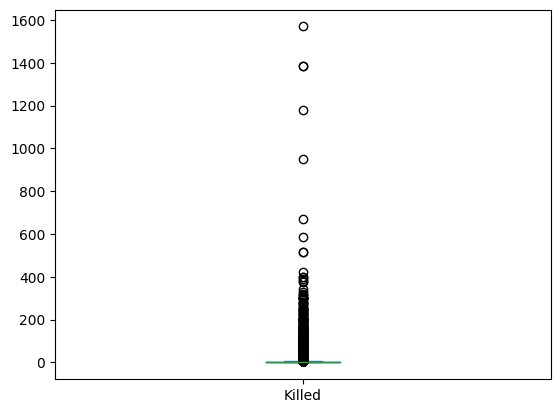

In [169]:
df['Killed'].plot.box()

# Bivariate Analysis

<Axes: xlabel='Year', ylabel='Killed'>

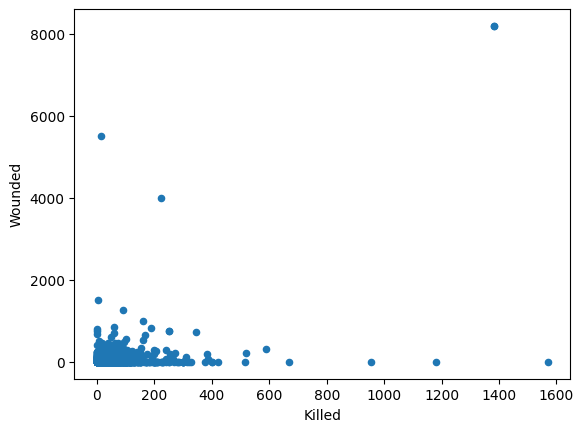

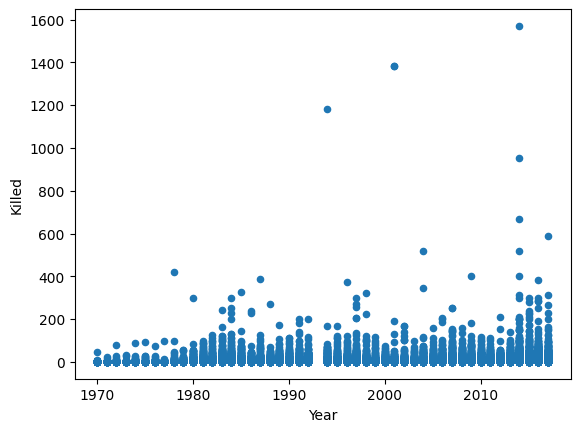

In [170]:
df.plot.scatter('Killed', 'Wounded')
df.plot.scatter('Year', 'Killed')

In [171]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.graph_objects as go

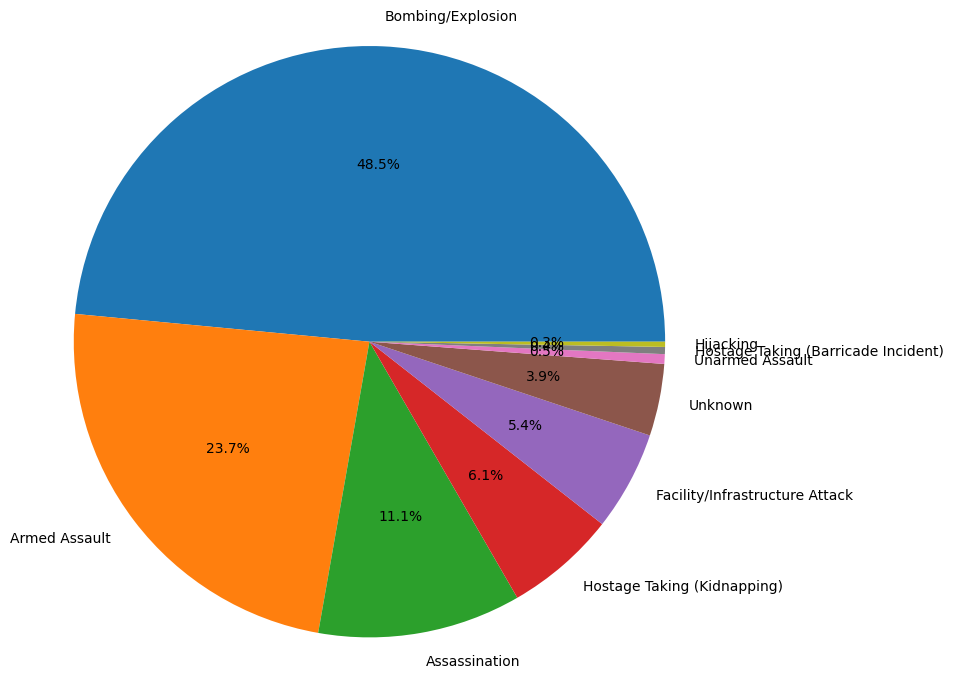

In [172]:
# Visualizing the attack types and theie percentage of occurance in the period 1970-2015
# It can be observed that there are 4% unknown attacks which will be handled by replacing mode values.

df['AttackType'].unique()
category_counts = df['AttackType'].value_counts()
plt.pie(category_counts,labels = category_counts.index, autopct='%1.1f%%',radius = 2)
plt.show()

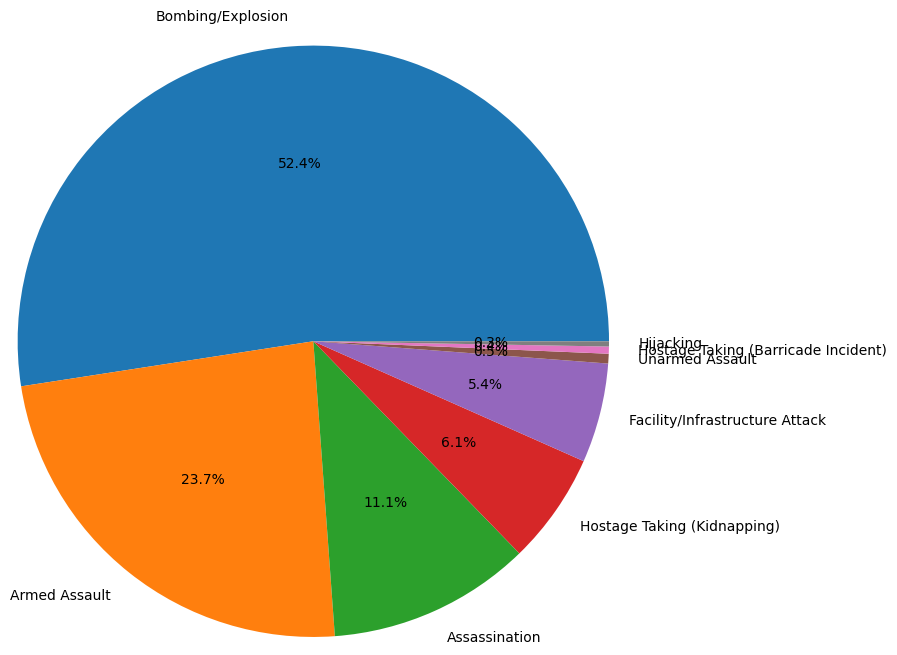

In [173]:
# Replacing the Unknown with Mode

df["AttackType"] = df["AttackType"].replace("Unknown", df["AttackType"].mode()[0])
category_counts = df['AttackType'].value_counts()
plt.pie(category_counts,labels = category_counts.index, autopct='%1.1f%%',radius = 2)
plt.show()

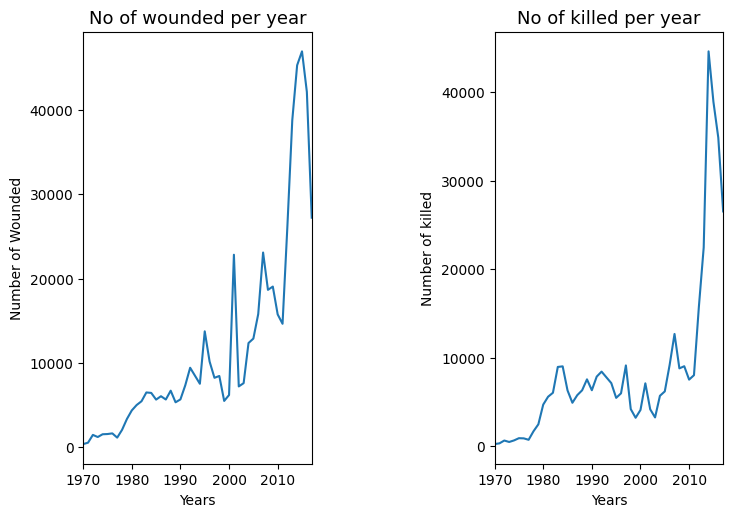

In [174]:
# Visualizing the number of killed and number of wounded per year.

# Plotting graph for the number of wounded by the terrorist attack per year.
no_of_wounded=df[["Year","Wounded"]].groupby("Year").sum()
plt.subplot(1,2,1)
plt.plot(no_of_wounded)
plt.title("No of wounded per year",fontsize=13)
plt.xlabel("Years")
plt.xlim(1970,2017)
plt.ylabel("Number of Wounded")

# Plotting graph for the number of killed by the terrorist attack per year.
no_of_killed=df[["Year","Killed"]].groupby("Year").sum()
plt.subplot(1,2,2)
plt.plot(no_of_killed)
plt.xlabel("Years")
plt.ylabel("Number of killed")
plt.xlim(1970,2017)
plt.title("No of killed per year",fontsize=13)
plt.subplots_adjust(left=2, right=3, top=1, bottom=0.1, wspace=0.8, hspace=0.6)

<Axes: xlabel='AttackType'>

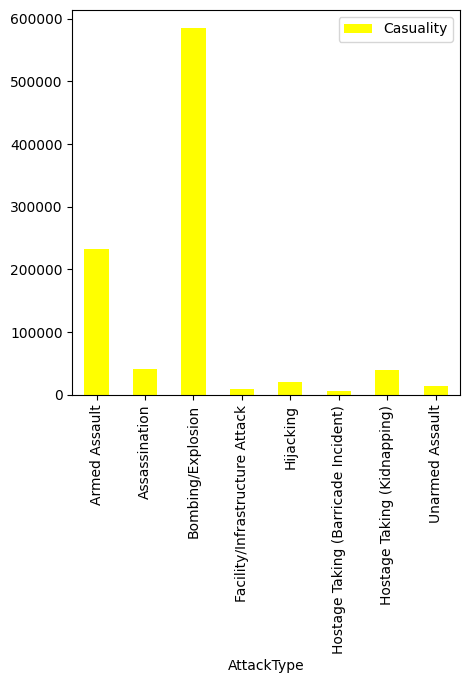

In [175]:
# The casuality caused by the attacks is displayed using the bar graph

df['Casuality'] = df['Wounded']+df['Killed']
no_of_wounded = df[["AttackType","Casuality"]].groupby("AttackType").sum()
no_of_wounded.plot(kind="bar",color="yellow",figsize=(5,5))

In [176]:
pd.crosstab(df["TargetType"], df["WeaponType"])

WeaponType,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
TargetType,,,,,,,,,,,,
Abortion Related,0,0,48,0,19,174,6,0,0,0,0,0
Airports & Aircraft,1,3,780,15,162,94,29,0,0,3,88,0
Business,4,16,10581,2,3664,2280,171,9,0,13,1340,6
Educational Institution,1,44,2164,0,938,513,63,11,0,2,271,2
Food or Water Supply,0,3,180,0,51,21,1,0,1,0,16,0
Government (Diplomatic),1,11,1681,2,971,291,63,3,0,1,340,4
Government (General),13,34,8873,4,7927,1168,292,10,10,4,1453,17
Journalists & Media,6,6,793,0,1171,178,110,8,1,4,399,2
Maritime,0,0,113,0,117,8,4,0,0,1,38,0


In [177]:
# Replacing the Unknown type in WeaponType and TargetType columns with modes of respective values

df["WeaponType"] = df["WeaponType"].replace("Unknown", df["WeaponType"].mode()[0])
df["TargetType"] = df["TargetType"].replace("Unknown", df["TargetType"].mode()[0])

In [178]:
pd.crosstab(df["AttackType"], df["WeaponType"])

WeaponType,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
AttackType,,,,,,,,,,,
Armed Assault,0,2,1980,0,33986,1535,1413,3,0,2,7
Assassination,0,14,4414,0,12910,129,744,3,0,1,14
Bombing/Explosion,0,61,85118,6,659,183,7,3,0,2,1
Facility/Infrastructure Attack,1,21,494,2,1031,7124,106,21,0,114,17
Hijacking,0,0,154,15,247,16,27,0,0,0,5
Hostage Taking (Barricade Incident),0,2,207,0,377,30,21,0,0,1,0
Hostage Taking (Kidnapping),0,4,4459,3,4822,102,560,34,0,2,0
Unarmed Assault,30,165,2,1,0,35,489,43,13,0,90


In [179]:
x_year = df['Year'].unique()
df['Count'] = 1
y_count_years = df.groupby(df['Year']).count()['Count'].sort_index()

fig = go.Figure(data=go.Bar(x=x_year, y=y_count_years))
fig.update_layout(title='Number of attacks occuring in a year',xaxis_title='Years', yaxis_title='No of Attacks')

Text(0, 0.5, 'No.of attacks success')

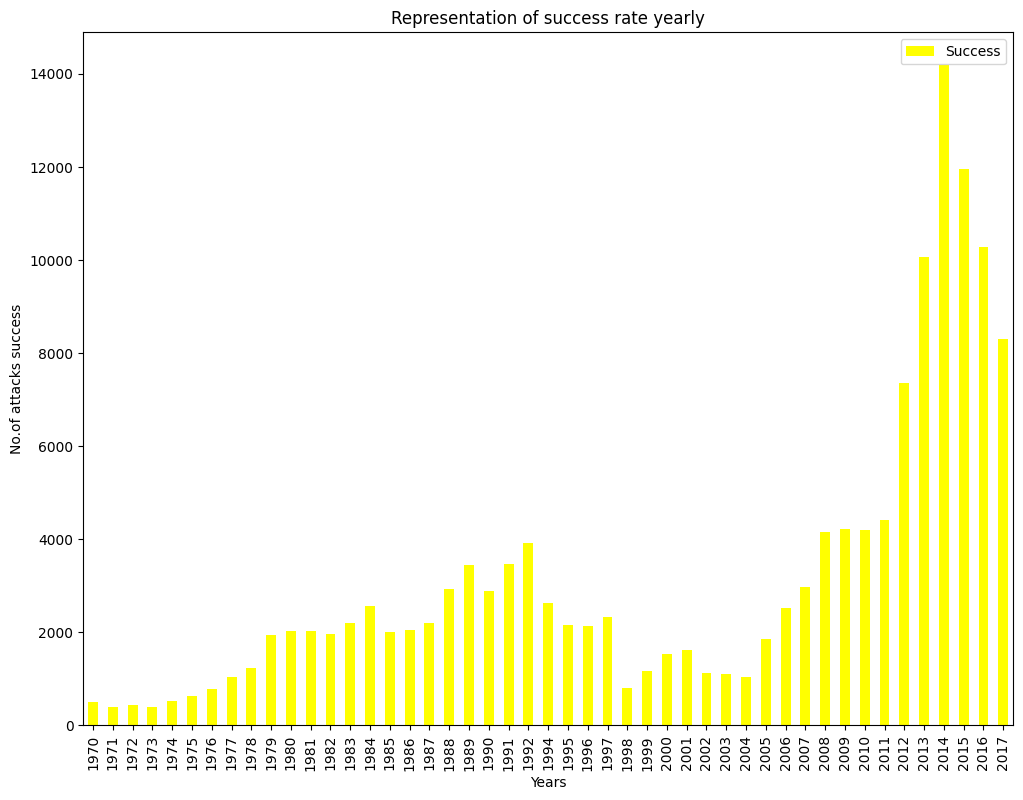

In [180]:
no_of_wounded=df[["Year","Success"]].groupby("Year").sum()
no_of_wounded.plot(kind="bar",color="yellow",figsize=(12,9))
plt.title("Representation of success rate yearly")
plt.xlabel("Years")
plt.ylabel("No.of attacks success")

In [181]:
print(df['City'].value_counts())

# Replacing the Unknown value in City column with the mode value
df["City"] = df["City"].replace("Unknown", df["City"].mode()[0])

Baghdad          7396
Unknown          6200
Karachi          2159
Mosul            2041
Belfast          1992
                 ... 
Longlai Hasnu       1
Soreang             1
Don Matias          1
Maibong             1
Kaiga               1
Name: City, Length: 34598, dtype: int64


In [182]:
# Visualizing top 5 countries and cities in regards with the attacks

topCountries = df['Country'].value_counts()[:5]
topCities = df['City'].value_counts()[:5]
fig = go.Figure()
fig.add_trace(go.Bar(x=topCountries.index, y=topCountries.values, name="Top 5 Countries", marker_color='orange'))
fig.add_trace(go.Bar(x=topCities.index, y=topCities.values, name="Top 5 Cities", marker_color='purple'))
fig.update_layout(barmode='group', xaxis_title="Globally Top Hotspots", yaxis_title="Count of attacks",title="Subplotting the top countries and top cities")
fig.show()

# Handling Outliers

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


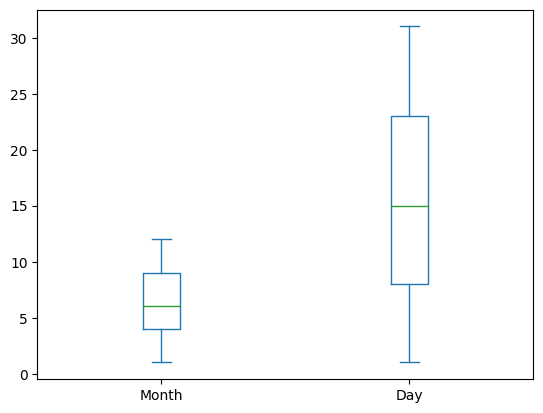

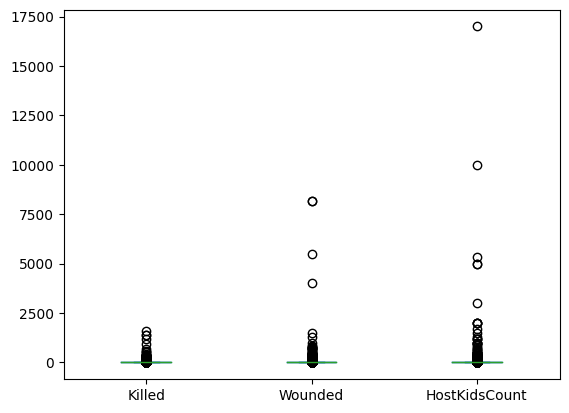

In [183]:
print(df[['Month', 'Day']].plot.box())

print(df[['Killed', 'Wounded', 'HostKidsCount']].plot.box())

In [184]:
def handle_outliers(out_data_cols):
  for i in out_data_cols:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df.loc[df[i] > Q3+(1.5*IQR), i] = np.mean(df[i])
    df.loc[df[i] < Q1-(1.5*IQR), i] = np.mean(df[i])

out_data_cols = ['Killed', 'Wounded', 'HostKidsCount']
handle_outliers(out_data_cols)

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


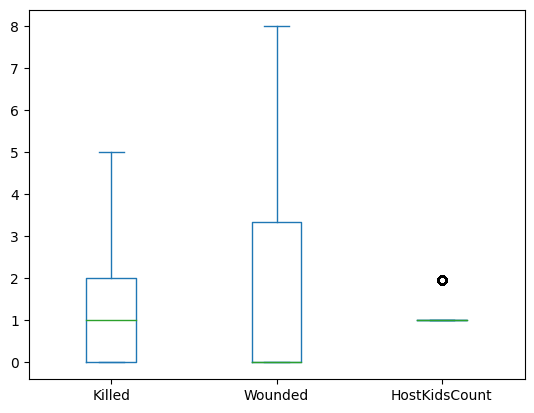

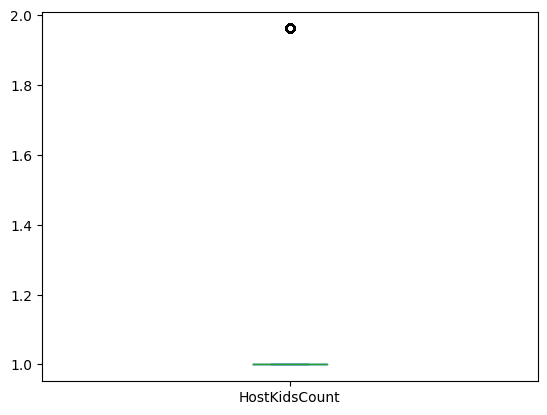

In [185]:
print(df[['Killed', 'Wounded', 'HostKidsCount']].plot.box())
print(df[['HostKidsCount']].plot.box())

# **Phase 2**


In [186]:
df.head(5)

,Year,Month,Day,Country,City,Latitude,Longitude,Success,AttackType,TargetType,Target,WeaponType,Killed,Wounded,HostKidsCount,Casuality,Count
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Julio Guzman,Explosives,1.000000,0.000000,1.0,1.000000,1
437,1970,7,28,Spain,Pamplona,42.815372,-1.653616,1,Bombing/Explosion,Journalists & Media,Publication EL Pansamiento Navarro,Explosives,2.470223,3.350633,1.0,5.820856,1
438,1970,7,30,United States,Alameda,37.774422,-122.275475,1,Bombing/Explosion,Government (General),Alameda County Courthouse,Explosives,0.000000,0.000000,1.0,0.000000,1
439,1970,7,30,United States,Chicago,41.842602,-87.681229,0,Bombing/Explosion,Utilities,"Power Lines, Illinois central railroad",Explosives,0.000000,0.000000,1.0,0.000000,1
440,1970,7,31,Uruguay,Montevideo,-34.891151,-56.187214,1,Hostage Taking (Kidnapping),Government (Diplomatic),"Michael Gurden Jones,second secretary, *",Explosives,2.470223,3.350633,1.0,5.820856,1


In [187]:
df = df.drop(columns='Count')
df.dtypes

Year               int64
Month              int64
Day                int64
Country           object
City              object
Latitude         float64
Longitude        float64
Success            int64
AttackType        object
TargetType        object
Target            object
WeaponType        object
Killed           float64
Wounded          float64
HostKidsCount    float64
Casuality        float64
dtype: object

In [188]:
df['Success'].value_counts()

1    145576
0     18508
Name: Success, dtype: int64

In [189]:
Numeric_col = df.select_dtypes(include = ['int', 'float']).columns
for i in Numeric_col:
    min = df[i].min()
    max = df[i].max()
    df[i] = (df[i] - min)/(max - min)
df.head()

,Year,Month,Day,Country,City,Latitude,Longitude,Success,AttackType,TargetType,Target,WeaponType,Killed,Wounded,HostKidsCount,Casuality
0,0.0,0.545455,0.033333,Dominican Republic,Santo Domingo,0.560392,0.999997,1.0,Assassination,Private Citizens & Property,Julio Guzman,Explosives,0.200000,0.000000,0.0,0.000104
437,0.0,0.545455,0.900000,Spain,Pamplona,0.751008,0.999998,1.0,Bombing/Explosion,Journalists & Media,Publication EL Pansamiento Navarro,Explosives,0.494045,0.418829,0.0,0.000608
438,0.0,0.545455,0.966667,United States,Alameda,0.711561,0.999997,1.0,Bombing/Explosion,Government (General),Alameda County Courthouse,Explosives,0.000000,0.000000,0.0,0.000000
439,0.0,0.545455,0.966667,United States,Chicago,0.743396,0.999997,0.0,Bombing/Explosion,Utilities,"Power Lines, Illinois central railroad",Explosives,0.000000,0.000000,0.0,0.000000
440,0.0,0.545455,1.000000,Uruguay,Montevideo,0.142920,0.999997,1.0,Hostage Taking (Kidnapping),Government (Diplomatic),"Michael Gurden Jones,second secretary, *",Explosives,0.494045,0.418829,0.0,0.000608


In [190]:
df=pd.get_dummies(df,columns = ['AttackType','WeaponType'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164084 entries, 0 to 181690
Data columns (total 33 columns):
 #   Column                                                                                  Non-Null Count   Dtype  
---  ------                                                                                  --------------   -----  
 0   Year                                                                                    164084 non-null  float64
 1   Month                                                                                   164084 non-null  float64
 2   Day                                                                                     164084 non-null  float64
 3   Country                                                                                 164084 non-null  object 
 4   City                                                                                    164084 non-null  object 
 5   Latitude                                                  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164084 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column                                                                                  Non-Null Count   Dtype  
---  ------                                                                                  --------------   -----  
 0   Killed                                                                                  164084 non-null  float64
 1   Wounded                                                                                 164084 non-null  float64
 2   HostKidsCount                                                                           164084 non-null  float64
 3   Casuality                                                                               164084 non-null  float64
 4   AttackType_Armed Assault                                                                164084 non-null  uint8  
 5   AttackType_Assassination                                  

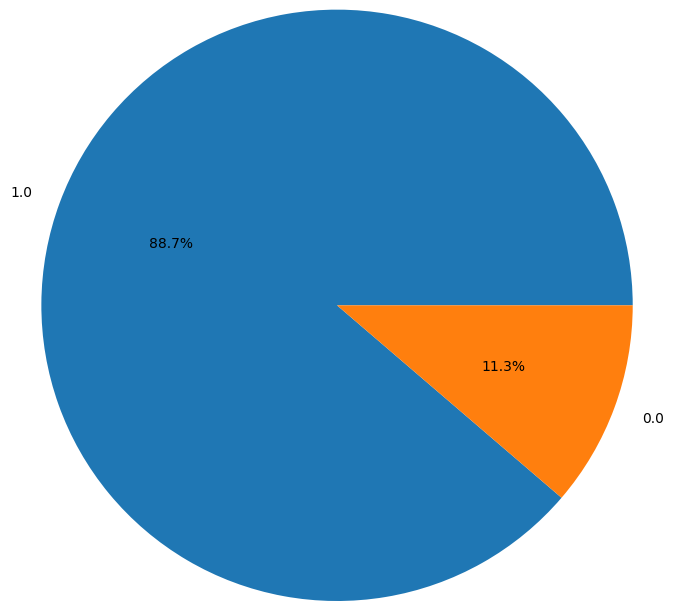

In [191]:
X = df.iloc[:,10:33]
y = df['Success']
X.info()

category_counts = df['Success'].value_counts()
plt.pie(category_counts,labels = category_counts.index, autopct='%1.1f%%',radius = 2)
plt.show()

In [192]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [193]:
from pandas.core import algorithms
import numpy as np
from sklearn.svm import SVC as SVM_clas
from sklearn.linear_model import LogisticRegression as Log_reg
from sklearn.cluster import KMeans as K_Means
from sklearn.neighbors import KNeighborsClassifier as KNN_clas
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.ensemble import RandomForestClassifier as randF_class
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,mean_squared_log_error
from sklearn.metrics import roc_curve, auc


def Metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, pos_label=1)
    precision = precision_score(y_true, y_pred, pos_label=1)
    f1 = f1_score(y_true, y_pred)
    msle = mean_squared_log_error(y_true, y_pred)

    print("Metrics of the model:")
    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1}")
    print(f"Mean Squared Logarithmic Error: {msle}")

def kmeansMetrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, pos_label=1,average='micro')
    precision = precision_score(y_true, y_pred, pos_label=1,average='micro')
    f1 = f1_score(y_true, y_pred,average='micro')
    msle = mean_squared_log_error(y_true, y_pred)

    print("Metrics of the model:")
    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1}")
    print(f"Mean Squared Logarithmic Error: {msle}")


def ConfusionMatrix(y_true, y_pred, title):
    c = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(c, annot=True, fmt="d", cmap="summer", cbar=True)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


def plot_roc_curve(y_test, predicted_probabilities):
    FalsePositive, TruePositive, thresholds = roc_curve(y_test, predicted_probabilities[:, 1])
    Auc = auc(FalsePositive, TruePositive)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(FalsePositive, TruePositive, color='red', lw=2, label=f'AUC = {Auc}')
    plt.plot([0, 1], [0, 1], color='yellow', lw=2, linestyle='dotted')
    plt.xlabel('FalsePositive')
    plt.ylabel('TruePositive')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


Metrics of the model:
Accuracy: 0.9066032848828351
Recall: 0.9957130118663832
Precision: 0.9080474150064116
F1 Score: 0.9498617722595737
Mean Squared Logarithmic Error: 0.04487273326810152


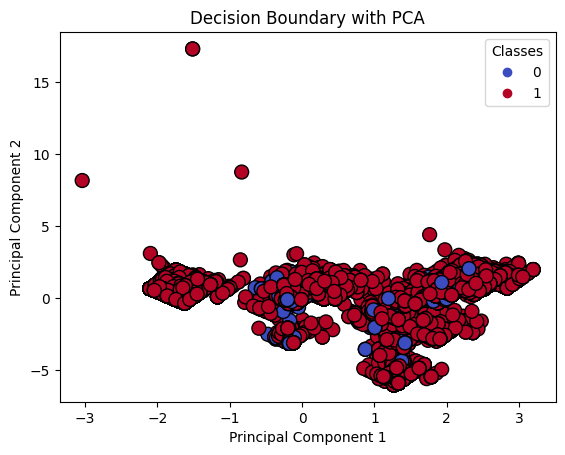

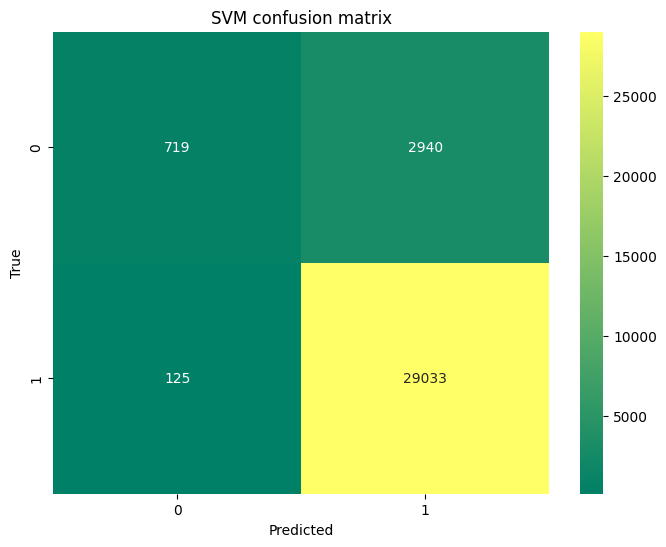

In [210]:
from sklearn.decomposition import PCA
def Algorithms_6(X_train, y_train, X_test, y_test):


    # Implementing Support Vector Machine (SVM) Classifier
    A1 = SVM_clas(C=1.0)
    A1.fit(X_train, y_train)
    SVM_predictions = A1.predict(X_test)
    Metrics(y_test, SVM_predictions)
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    A1.fit(X_train_pca, y_train)


    # Scatter plot the actual data
    scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', s=100)


    # Add legends and labels
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.title("Decision Boundary with PCA")
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
    ConfusionMatrix(y_test, SVM_predictions,title ="SVM confusion matrix")


res = Algorithms_6(X_train_scaled, y_train, X_test_scaled,y_test)

Metrics of the model:
Accuracy: 0.8875887497333699
Recall: 0.9807599972563276
Precision: 0.9014026792750197
F1 Score: 0.939408373437577
Mean Squared Logarithmic Error: 0.054008323988915655
Knn predictions: [1. 1. 1. ... 1. 1. 1.]


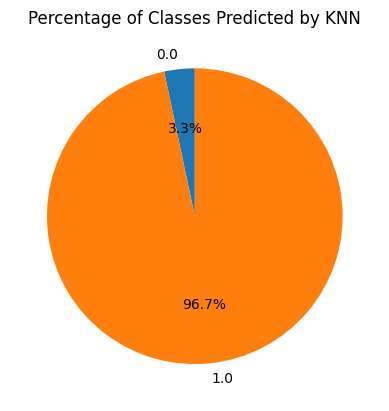

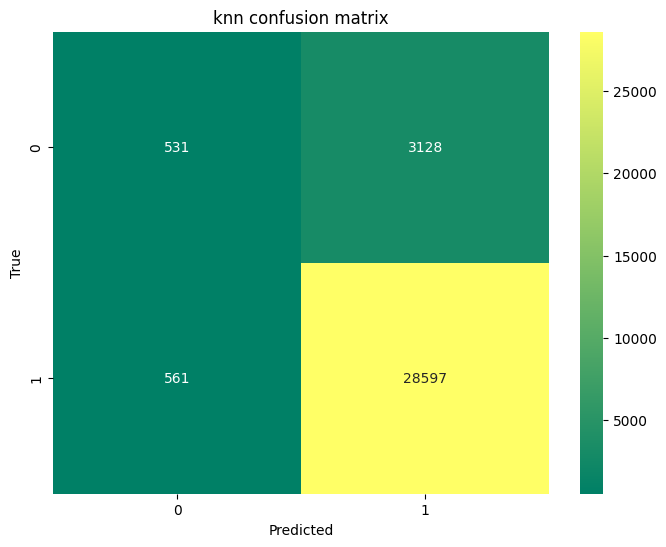

In [195]:
def Algorithms_6(X_train, y_train, X_test, y_test):
    # Implementing K-Nearest Neighbors (KNN) Classifier


    A4 = KNN_clas(n_neighbors=3,weights = "uniform")
    A4.fit(X_train, y_train)
    knn_predictions = A4.predict(X_test)
    Metrics(y_test, knn_predictions)
    print("Knn predictions:",knn_predictions)
    unique_classes, class_counts = np.unique(knn_predictions, return_counts=True)
    plt.pie(class_counts, labels=unique_classes, autopct='%1.1f%%', startangle=90)
    plt.title('Percentage of Classes Predicted by KNN')
    plt.show()

    ConfusionMatrix(y_test, knn_predictions,title ="knn confusion matrix")

List_ndarray = Algorithms_6(X_train_scaled, y_train, X_test_scaled,y_test)

In [196]:
!pip install graphviz

Metrics of the model:
Accuracy: 0.9061157326995155
Recall: 0.9933465944166266
Precision: 0.9093592037926596
F1 Score: 0.9494992542083953
Mean Squared Logarithmic Error: 0.045106979184019826
Decision Tree predictions: [1. 1. 0. ... 1. 1. 1.]


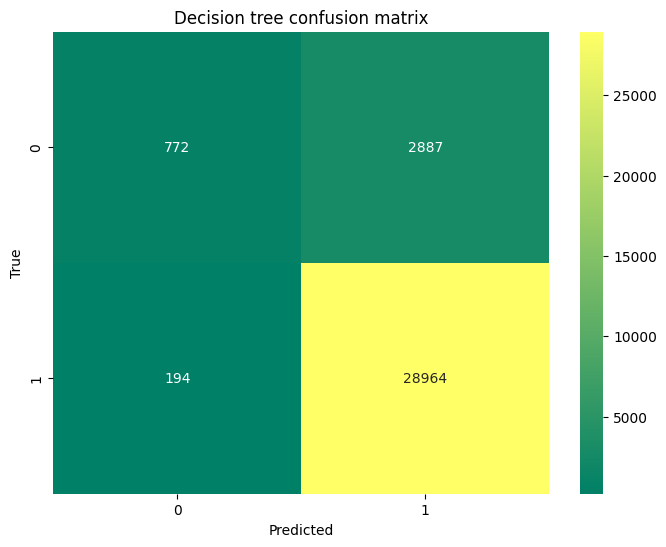

In [197]:
import graphviz
from sklearn.tree import DecisionTreeClassifier as DTree_F, export_graphviz
def Algorithms_6(X_train, y_train, X_test, y_test):
    #Implementing Decision Tree Classifier
    A6 = DTree_F()
    A6.fit(X_train, y_train)
    decision_tree_predictions = A6.predict(X_test)
    Metrics(y_test, decision_tree_predictions)
    print("Decision Tree predictions:",decision_tree_predictions)
    ConfusionMatrix(y_test, decision_tree_predictions,title ="Decision tree confusion matrix")
    dot_data = export_graphviz(A6, out_file=None,
                               feature_names=[f"Feature {i}" for i in range(X_train.shape[1])],
                               class_names=[str(i) for i in A6.classes_],
                               filled=True, rounded=True, special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render("DecisionTree")  # Saves the visualization to a file
    graph.view("DecisionTreeView")

res = Algorithms_6(X_train_scaled, y_train, X_test_scaled,y_test)

Metrics of the model:
Accuracy: 0.5404820672212572
Recall: 0.5404820672212572
Precision: 0.5404820672212572
F1 Score: 0.5404820672212572
Mean Squared Logarithmic Error: 0.22077677575300841


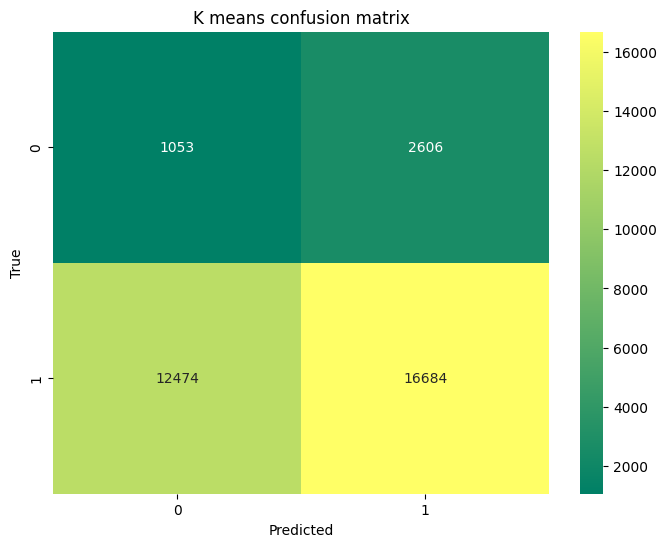

Metrics of the model:
Accuracy: 0.40485114422403023
Recall: 0.40485114422403023
Precision: 0.40485114422403023
F1 Score: 0.40485114422403023
Mean Squared Logarithmic Error: 0.2702652161509883


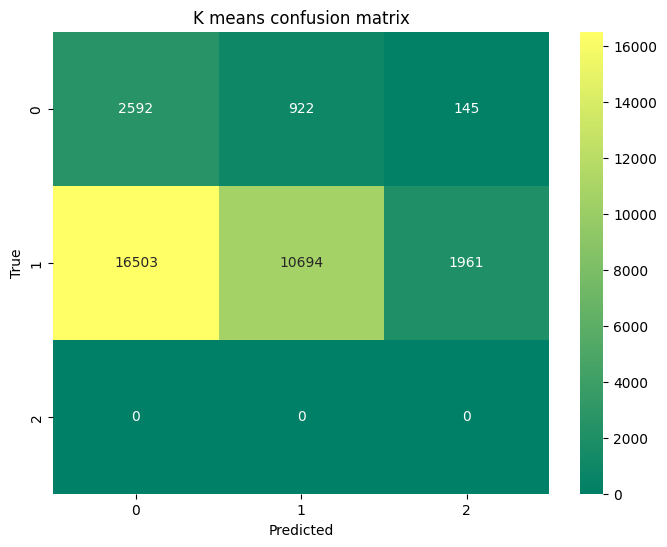

Metrics of the model:
Accuracy: 0.32748270713349786
Recall: 0.32748270713349786
Precision: 0.32748270713349786
F1 Score: 0.32748270713349786
Mean Squared Logarithmic Error: 0.40049408544607645


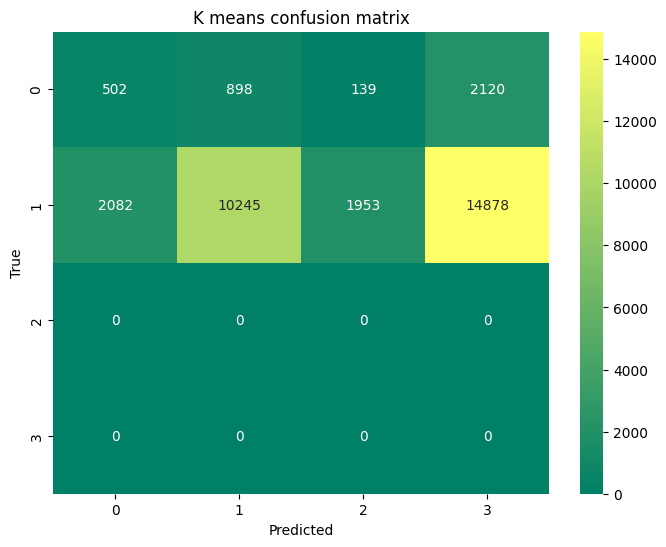

In [209]:
def Algorithms_6(X_train, y_train, X_test, y_test):
    for k in range(2, 5):
        A3 = K_Means(n_clusters=k, n_init=10)
        # A3.fit(X_train)

        pca = PCA(n_components=2)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        A3.fit(X_train_pca, y_train)
        kmeans_predictions = A3.predict(X_test_pca)
        kmeansMetrics(y_test, kmeans_predictions)
        ConfusionMatrix(y_test, kmeans_predictions,title ="K means confusion matrix")

        plt.show()


res = Algorithms_6(X_train_scaled, y_train, X_test_scaled, y_test)



Metrics of the model:
Accuracy: 0.6417100892829936
Recall: 0.6276836545716441
Precision: 0.9530306186211206
F1 Score: 0.7568752326206526
Mean Squared Logarithmic Error: 0.17214146746046904
naive_bayes_predictions: [0. 0. 0. ... 1. 1. 1.]


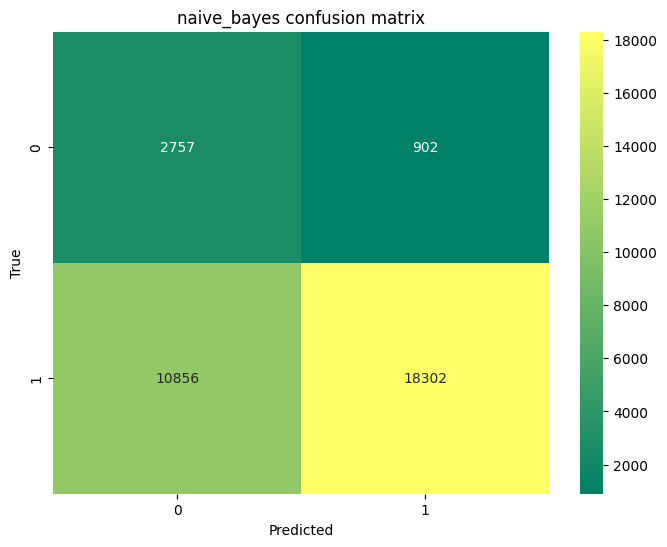

In [199]:
def Algorithms_6(X_train, y_train, X_test, y_test):
    # Implementing Naive Bayes Classifier (Gaussian Naive Bayes)
    A5 = NB(var_smoothing=0.0001)
    A5.fit(X_train, y_train)
    naive_bayes_predictions = A5.predict(X_test)
    Metrics(y_test, naive_bayes_predictions)
    print("naive_bayes_predictions:",naive_bayes_predictions)
    ConfusionMatrix(y_test, naive_bayes_predictions,title ="naive_bayes confusion matrix")

res = Algorithms_6(X_train_scaled, y_train, X_test_scaled,y_test)

Metrics of the model:
Accuracy: 0.9068775329859524
Recall: 0.9944440633788326
Precision: 0.9092505487613672
F1 Score: 0.9499410300091732
Mean Squared Logarithmic Error: 0.04474096994039745


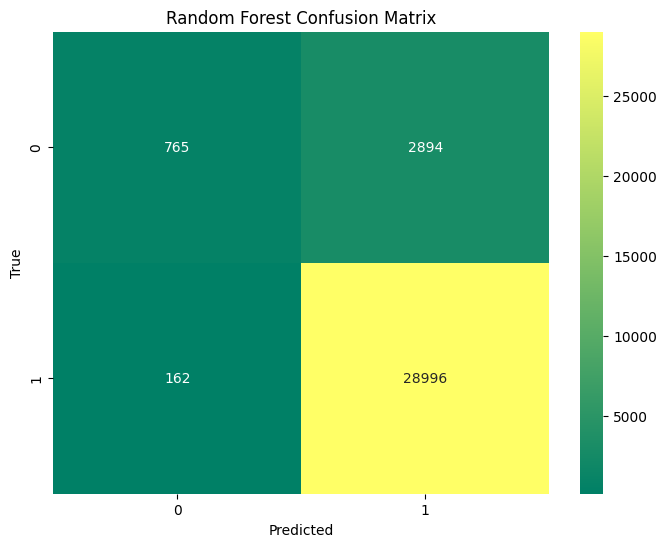

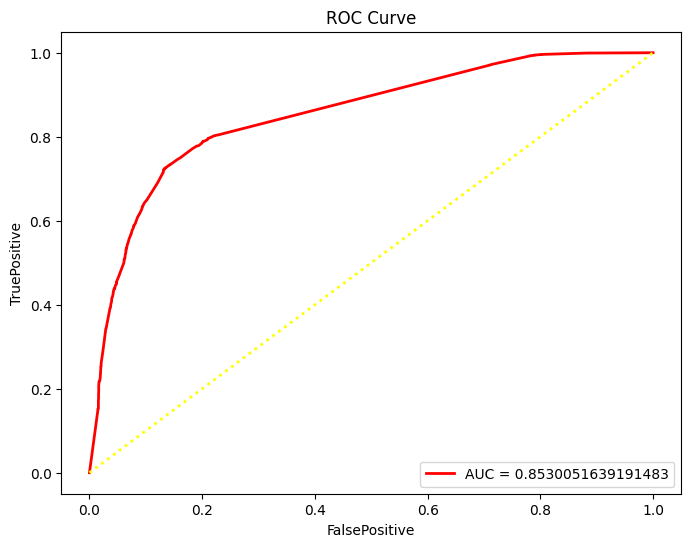

In [200]:
def Algorithms_6(X_train, y_train, X_test, y_test):
    # Implementing Random Forest Classifier
    A6 = randF_class(n_estimators=100)
    A6.fit(X_train, y_train)
    random_forest_predictions = A6.predict(X_test)
    predicted_probabilities = A6.predict_proba(X_test)
    Metrics(y_test, random_forest_predictions)
    ConfusionMatrix(y_test, random_forest_predictions, title="Random Forest Confusion Matrix")
    plot_roc_curve(y_test, predicted_probabilities)

res = Algorithms_6(X_train_scaled, y_train, X_test_scaled, y_test)

Metrics of the model:
Accuracy: 0.8948410884602492
Recall: 0.9976335825502435
Precision: 0.895845523698069
F1 Score: 0.9440036346525175
Mean Squared Logarithmic Error: 0.05052391598963077
logreg_predictions: [1. 1. 0. ... 1. 1. 1.]


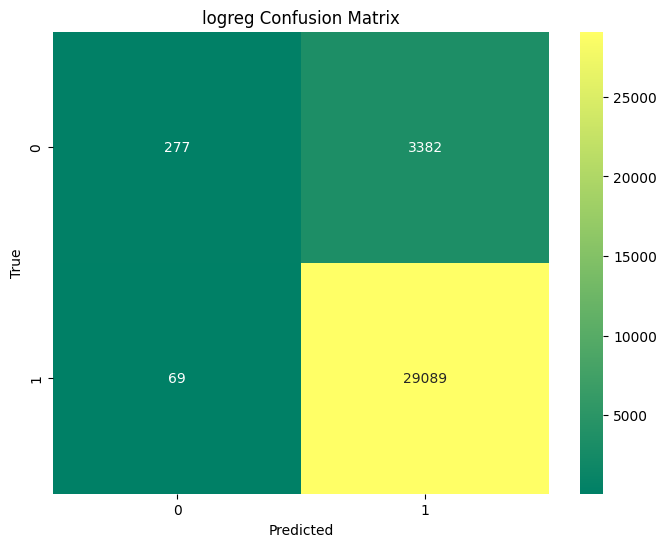

In [201]:
def Algorithms_6(X_train, y_train, X_test, y_test):
    # Implementing Logistic Regression Classifier
    A2 = Log_reg(max_iter=10000)
    A2.fit(X_train, y_train)
    logreg_predictions = A2.predict(X_test)
    Metrics(y_test, logreg_predictions)
    print("logreg_predictions:", logreg_predictions)
    ConfusionMatrix(y_test, logreg_predictions, title="logreg Confusion Matrix")

res = Algorithms_6(X_train_scaled, y_train, X_test_scaled, y_test)